In [1]:
import scipy.misc
import numpy as np
from PIL  import Image

In [71]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from tqdm import tqdm_notebook as tqdm


In [3]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

In [4]:
np.random.seed(42)

In [5]:
# 71 characters
nb_classes = 71
# input image dimensions
img_rows, img_cols = 32, 32

ary = np.load("hiragana.npz")['arr_0'].reshape([-1, 127, 128]).astype(np.float32) / 15
X_train = np.zeros([nb_classes * 160, img_rows, img_cols], dtype=np.float32)
for i in range(nb_classes * 160):
    X_train[i] = scipy.misc.imresize(ary[i], (img_rows, img_cols), mode='F')

/home/hexagramg/hiraclust/venv/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  if __name__ == '__main__':


In [9]:
len(ary)


11360

In [51]:
ary = np.load("hiragana.npz") 

In [11]:
ary['arr_0'].shape

(71, 160, 127, 128)

In [52]:
data = ary['arr_0']

In [8]:
data[0,0,:]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

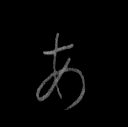

In [9]:
Image.fromarray(data[0,0,:])


In [53]:
firstLetter = data[0,:]

In [15]:
firstLetter.shape

(160, 127, 128)

In [316]:
flattenFl = firstLetter.flatten()

In [26]:
def biColor(X):
    if X>0:
        return 255
    else:
        return 0

In [14]:
def moment(array,m1,m2):
    moment = 0
    for y,ver in enumerate(array):
        for x,hor in enumerate(ver):
            moment += pow(x,m1)*pow(y,m2)*hor
    return moment

In [24]:
def centralmoment(array,m1,m2):
    cmoment = 0
    moment = center(array)
    for y,ver in enumerate(array):
        for x,hor in enumerate(ver):
            
            cmoment += pow(x-moment[0],m1)*pow(y-moment[1],m2)*hor
    return cmoment

In [23]:
def center(array):
    x = moment(array,1,0)/moment(array,0,0)
    y = moment(array,0,1)/moment(array,0,0)
    return (x,y)

In [74]:
def translate_img(img,x,y):
    a = 1
    b = 0
    c = x #left/right (i.e. 5/-5)
    d = 0
    e = 1
    f = y #up/down (i.e. 5/-5)
    return np.array(img.transform(img.size, Image.AFFINE, (a, b, c, d, e, f)))

In [92]:
def translate(array,x,y):
    buffer = np.roll(array,-x,axis=1)
    buffer = np.roll(buffer,-y,axis=0)
    return buffer

In [108]:
def centeredarray(array):
    buffer = []
    for pic in tqdm(array):
        shape = pic.shape
        centroid = center(pic)
        delta_x = -shape[1]/2 + centroid[0]
        delta_y = -shape[0]/2 + centroid[1]

        buffer += [translate(pic,int(delta_x),int(delta_y))]
    return buffer

In [109]:
test = np.array(centeredarray(firstLetter))

In [112]:
test.shape

(160, 127, 128)

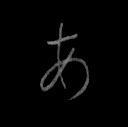

In [100]:
Image.fromarray(test[0])

In [96]:
center(test[0])

(63.14818599897803, 63.71870209504343)

In [25]:
centralmoment(firstLetter[0],0,0)

62767.0

In [20]:
x = moment(firstLetter[0],1,0)/moment(firstLetter[0],0,0)
y = moment(firstLetter[0],0,1)/moment(firstLetter[0],0,0)

In [21]:
[x,y]

[59.14818599897803, 73.71870209504344]

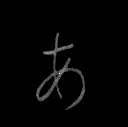

In [22]:
sample = firstLetter[0]
sample[int(y),int(x)] = 255
Image.fromarray(sample)

In [317]:
toWhite = np.vectorize(biColor)

In [318]:
newFlat = toWhite(flattenFl)

In [319]:
WhiteFL = newFlat.reshape(160,127,128).astype(np.uint8)

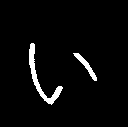

In [320]:
Image.fromarray(WhiteFL[0,:])

In [113]:
WhiteFL = test

In [114]:
firstLetter_ = WhiteFL.reshape(160,16256)

In [189]:
firstLetter_ = firstLetter.reshape(160,16256).astype(np.float)

In [116]:
n_samples, n_features = firstLetter_.shape
n_digits = 40

In [33]:
est = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)

est_ = KMeans(init='random', n_clusters=n_digits, n_init=10)


In [34]:
esst = est.fit(firstLetter_)

In [122]:
pred = esst.predict(firstLetter_)

NameError: name 'esst' is not defined

In [124]:
pred

array([5, 8, 1, 4, 3, 2, 3, 3, 3, 3, 3, 1, 6, 8, 8, 2, 5, 8, 8, 2, 5, 8,
       1, 2, 2, 4, 5, 2, 2, 2, 4, 4, 5, 2, 2, 2, 2, 8, 2, 1, 1, 8, 8, 4,
       8, 2, 2, 5, 5, 2, 8, 3, 2, 2, 3, 2, 2, 7, 1, 5, 8, 5, 3, 1, 8, 8,
       9, 8, 3, 2, 9, 4, 6, 8, 2, 8, 0, 2, 6, 1, 9, 3, 8, 3, 0, 3, 2, 2,
       8, 2, 5, 2, 2, 2, 5, 8, 2, 6, 3, 8, 2, 2, 2, 2, 2, 5, 8, 1, 1, 2,
       2, 2, 2, 2, 2, 8, 2, 5, 3, 2, 2, 2, 2, 5, 2, 5, 2, 2, 3, 2, 2, 8,
       2, 8, 2, 5, 5, 5, 9, 8, 8, 1, 1, 1, 2, 2, 4, 8, 3, 4, 8, 2, 3, 2,
       5, 1, 8, 1, 2, 2], dtype=int32)

In [131]:
inic = [i for i,v in enumerate(pred) if v ==5]

In [132]:
len(inic)

19

In [133]:
new_img = Image.new('L', (128*7, 128*7))

In [128]:
def avImage(arr, indic):
    average = np.zeros((127,128)).astype(np.uint)
    for i in indic:
        average = np.add(arr[i],average)
    average = (average.flatten()/len(inic)).reshape(127,128)
    print(average)
    return average

In [170]:
for i,v in enumerate(inic):
    iimg = Image.fromarray(WhiteFL[v,:])
    new_img.paste(iimg, (128*(i%7), 128*(i//7)))
    if (i+1) == len(inic):
        iimg = Image.fromarray(avImage(WhiteFL,inic).astype(np.uint8))
        new_img.paste(iimg, (128*((i+1)%7), 128*((i+1)//7)))


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [134]:
imgss = [WhiteFL[i] for i in inic]
new_img = np.average(imgss, axis = 0)

In [138]:
imgss = [firstLetter[i] for i in inic]
new_img = np.average(imgss, axis = 0)

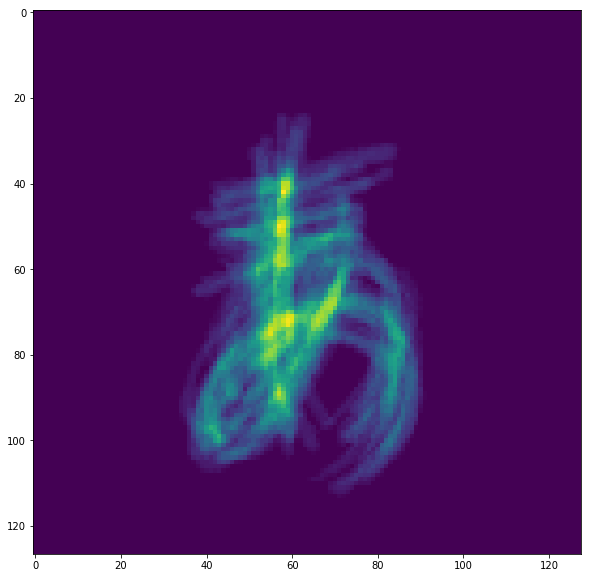

In [139]:
plt.imshow(new_img)

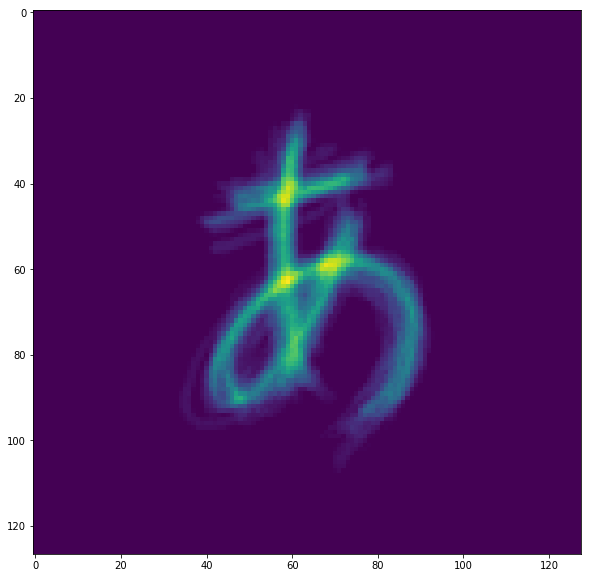

In [135]:
plt.imshow(new_img)

In [118]:
# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_digits).fit_transform(firstLetter_)
pcak = KMeans(init='k-means++', n_clusters=(n_digits//4), n_init=5)

print(82 * '_')



__________________________________________________________________________________


In [119]:
pcak.fit(pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=5, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [123]:
pred = pcak.predict(pca)